# Introduction

This notebook is designed to be the "exercise" notebook for you to practice defining hierarchical models. We will do this with the finches dataset again.

In [1]:
import pandas as pd
import pymc3 as pm
from data import load_finches_2012
from utils import despine_traceplot
import arviz as az

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = load_finches_2012()
df.groupby('species').size()

species
fortis      121
scandens    127
unknown       1
dtype: int64

In [3]:
df.sample(5)

,band,species,beak_length,beak_depth,species_enc
110,21283,fortis,10.9,10.3,0
39,19536,fortis,10.7,8.3,0
99,21258,fortis,10.6,8.5,0
164,19527,scandens,13.8,8.9,1
107,21276,fortis,10.1,8.3,0


In [4]:
df.groupby('species')['beak_depth'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
fortis,121.0,8.605372,0.732570,7.2,8.1,8.5,9.0,11.1
scandens,127.0,9.186220,0.669241,7.7,8.8,9.2,9.6,11.0
unknown,1.0,6.800000,NaN,6.8,6.8,6.8,6.8,6.8


In [5]:
fortis_filter = df['species'] == 'fortis'
scandens_filter = df['species'] == 'scandens'
unknown_filter = df['species'] == 'unknown'

**Exercise:** Define a hierarchical model for the finches beak depths. For bonus points, use NumPy-like fancy indexing!

If you'd like a hint, one possible model you can implement is shown below.

![](../images/darwins-finches-hierarchical-model.jpg)

In [6]:
with pm.Model() as beak_depth_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_depth'])

/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Sample from the posterior distribution!

In [7]:
with beak_depth_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sd, mean, beta_hyper, sd_hyper]
Sampling 4 chains:   0%|          | 0/10000 [00:00<?, ?draws/s]/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will res

Visualize the traceplots to check for convergence.

/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


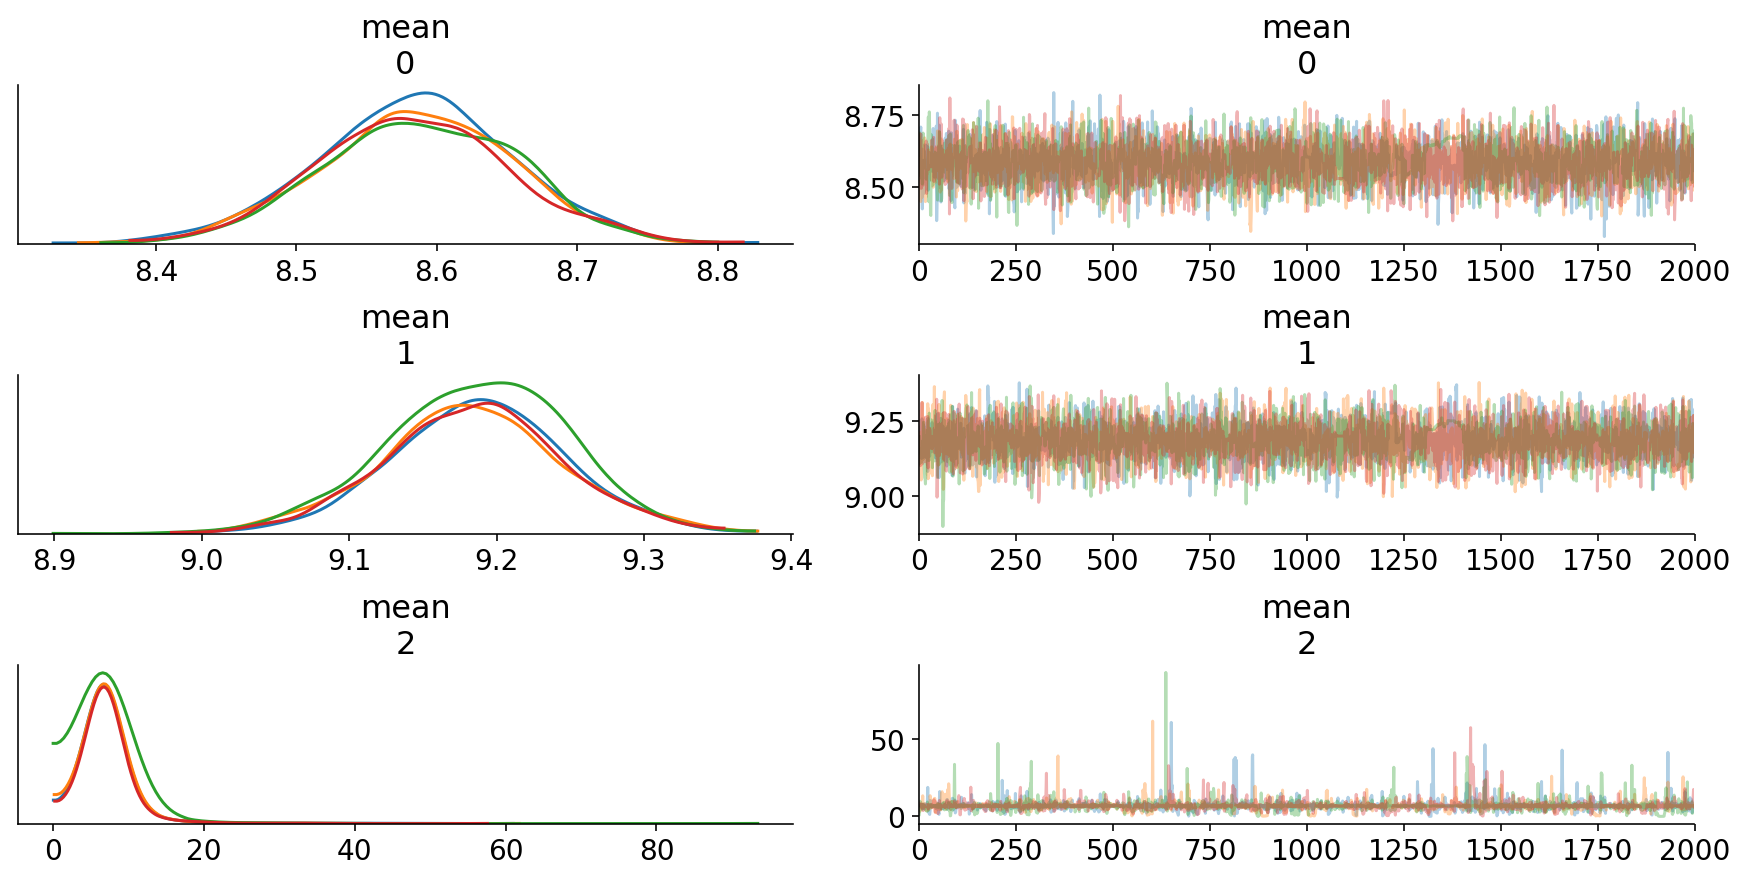

In [8]:
traces = az.plot_trace(trace, var_names=['mean'])
despine_traceplot(traces)

Visualize the posterior distributions using the `plot_posterior` or `forestplot` functions.

/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Text(0.5, 1.0, 'unknown')

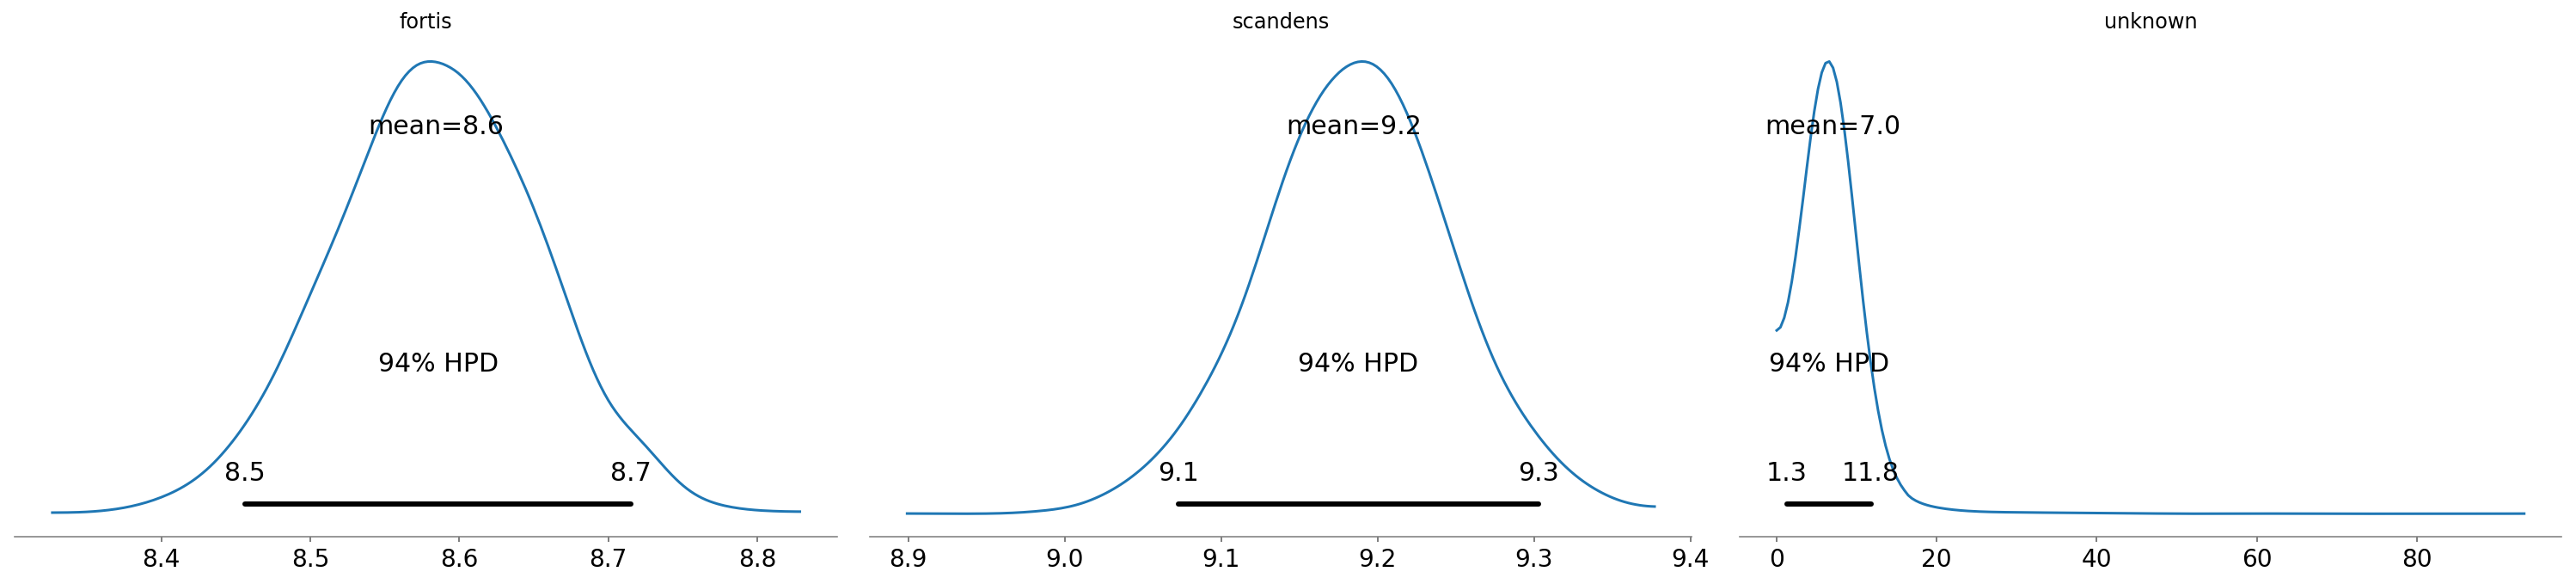

In [9]:
ax1, ax2, ax3 = az.plot_posterior(trace, var_names=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

Now, repeat the model specification for beak length.

In [11]:
with pm.Model() as beak_length_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_length'])

In [12]:
with beak_length_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sd, mean, beta_hyper, sd_hyper]
Sampling 4 chains: 100%|██████████| 10000/10000 [01:20<00:00, 123.63draws/s]
The acceptance probability does not match the target. It is 0.9014149455584451, but should be close to 0.95. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8490159688348388, but should be close to 0.95. Try to increase the number of tuning steps.


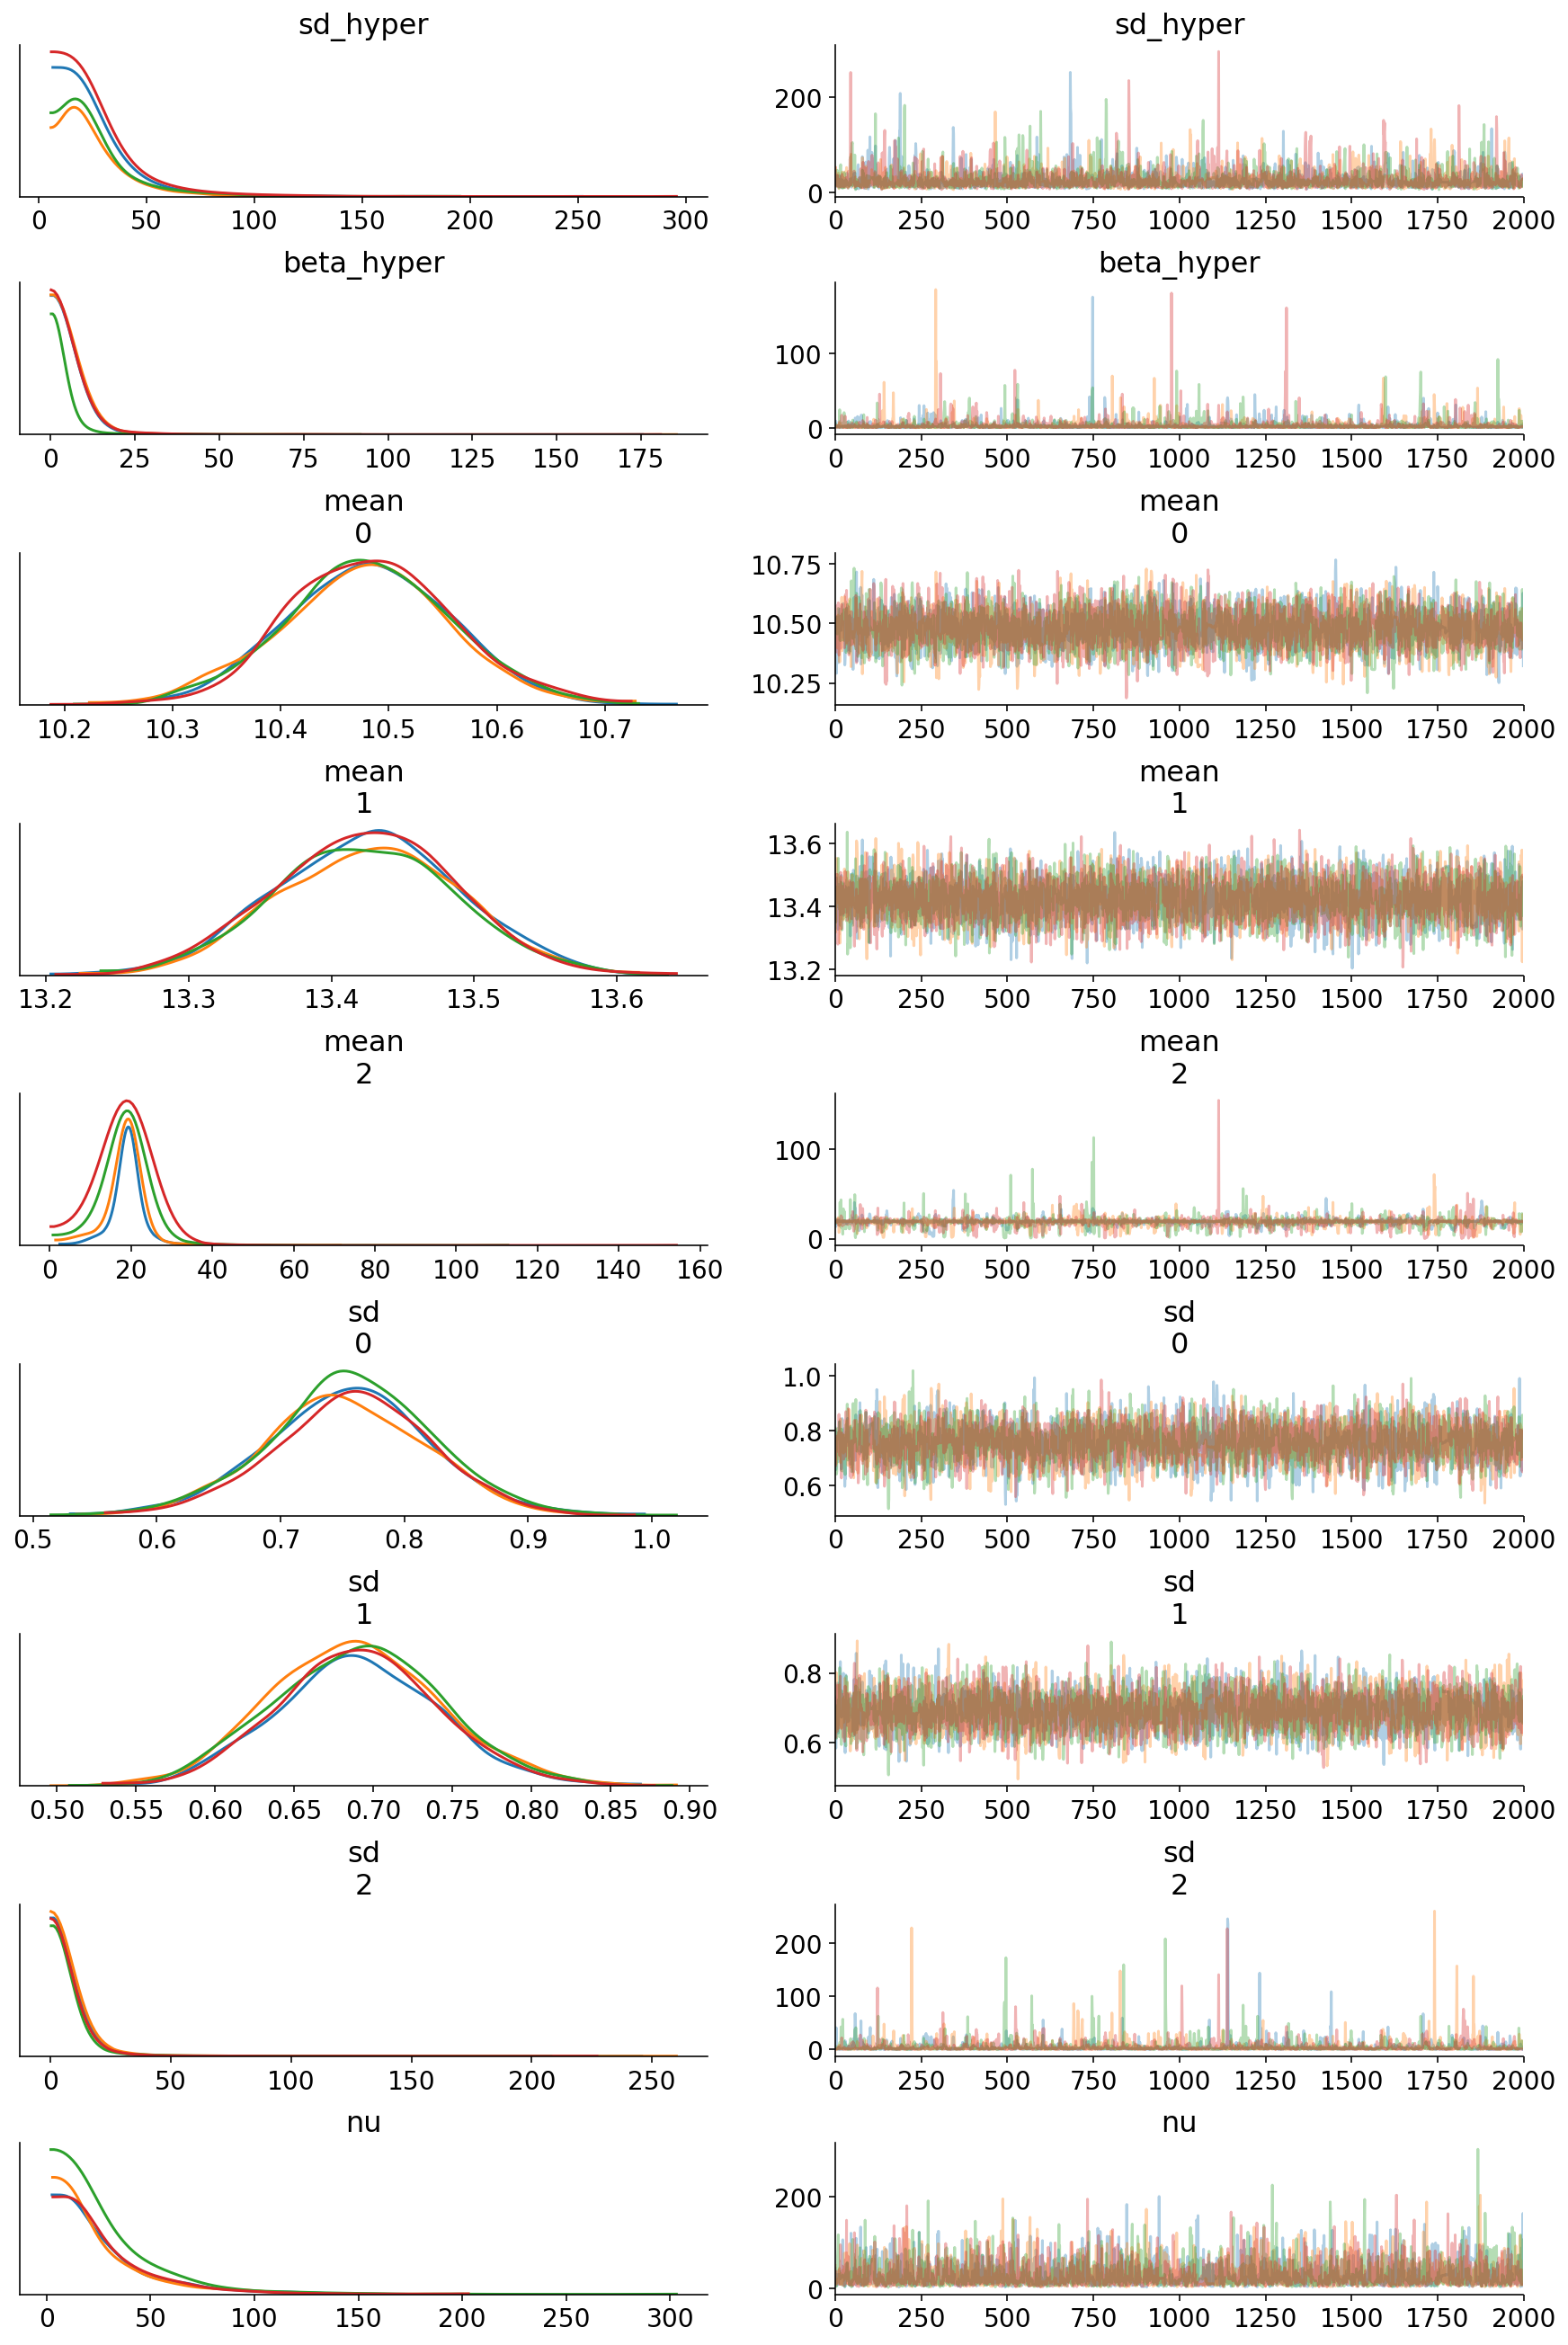

In [15]:
traces = az.plot_trace(trace)
despine_traceplot(traces)

/home/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Text(0.5, 1.0, 'unknown')

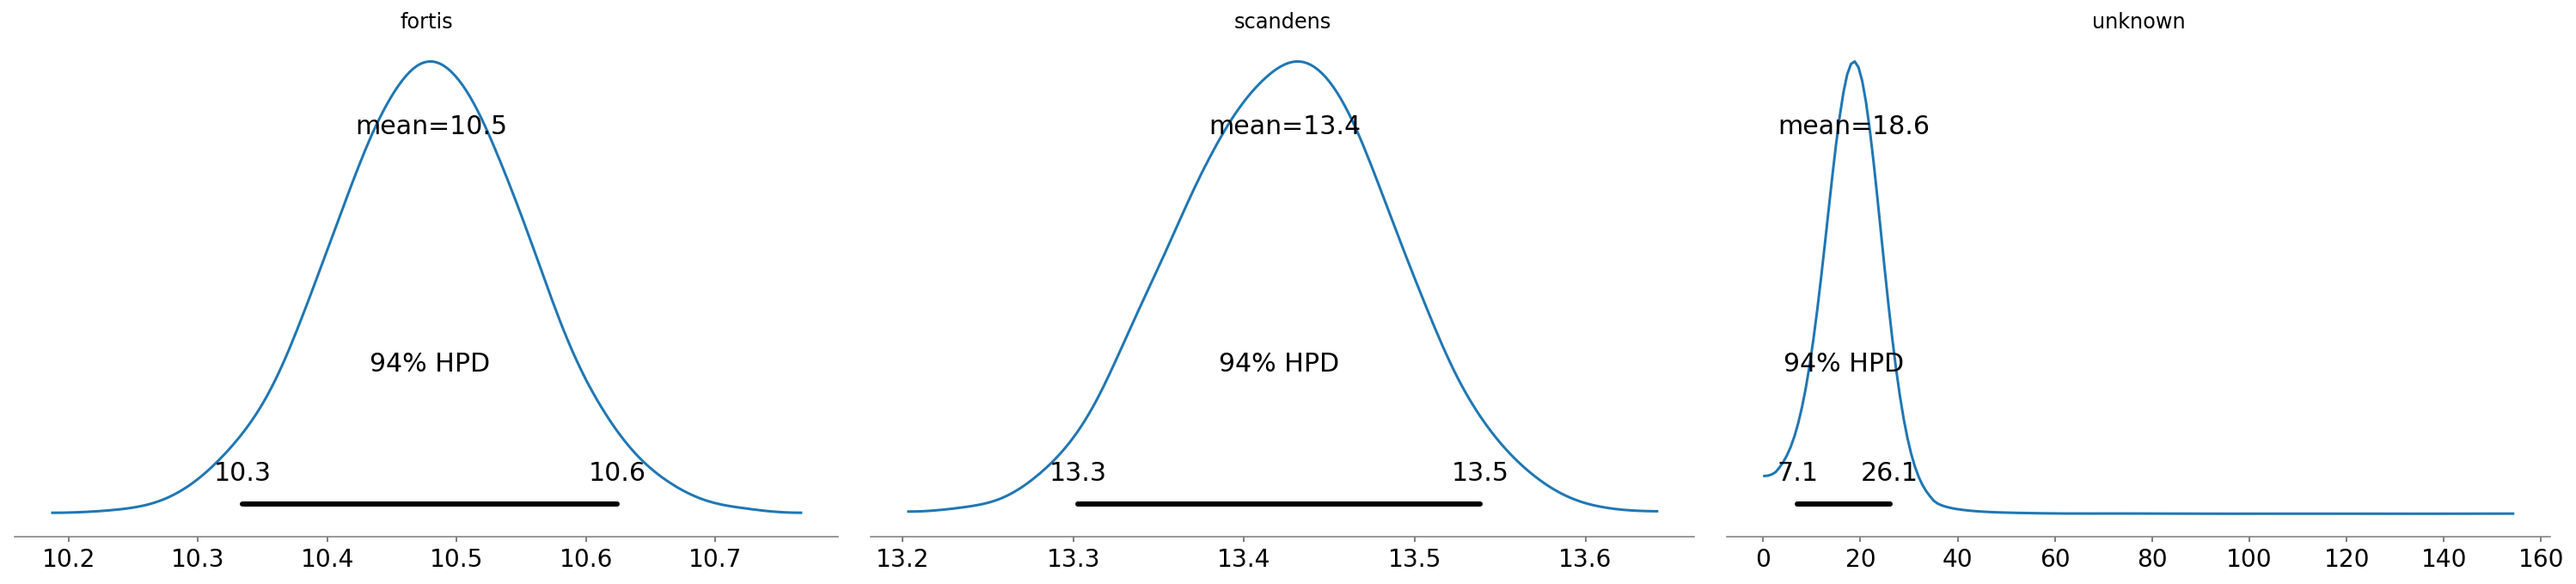

In [16]:
ax1, ax2, ax3 = az.plot_posterior(trace, var_names=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

**Discuss:** 

- Are the estimates for the unknown species' beak depth and beak length more reasonable? How so?